# **Naive Bayes**

In [2]:
import pandas as pd

In [4]:
# Explroing Dataset

df = pd.read_csv('new_dataset.csv')
df.head()

,Age,Income,Student,Creadit_Rating,Buys_Computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [12]:
# Description of data frame
df.describe()

,Age,Income,Student,Creadit_Rating,Buys_Computer
count,14,14,14,14,14
unique,3,3,2,2,2
top,<=30,medium,no,fair,yes
freq,5,6,7,8,9


In [13]:
# See Unique Values in Dataset

print( df['Income'].unique() )

print( df['Student'].unique() )

print( df['Age'].unique() )

print( df['Creadit_Rating'].unique() )

['high' 'medium' 'low']
['no' 'yes']
['<=30' '31-40' '>40']
['fair' 'excellent']


> #### How to build a basic model using Naive Bayes in Python?
____

Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under scikit learn library:

- Gaussian: It is used in classification and it assumes that features follow a normal distribution.

- Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

- Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

Thanks to [analyticsvidhya](analyticsvidhya.com/blog/2017/09/naive-bayes-explained)

#### From Above dataframe we see that our features[Age, Income, Student, CreditRating] are string values so to need to convert them into Numeric values 

Lets Try using Label Encoder

In [30]:
# Cols to Numeric Values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a = le.fit_transform(df['Income'])


le.classes_
print(a)
print(df['Income'])

# Add new Column for Income_N
df['Income_N'] = a

[0 0 0 2 1 1 1 2 1 2 2 2 0 2]
0       high
1       high
2       high
3     medium
4        low
5        low
6        low
7     medium
8        low
9     medium
10    medium
11    medium
12      high
13    medium
Name: Income, dtype: object


In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a = le.fit_transform(df['Student'])


le.classes_
print(a)
print(df['Student'])

# Add new Column for Student_N
df['Student_N'] = a

[0 0 0 0 1 1 1 0 1 1 1 0 1 0]
0      no
1      no
2      no
3      no
4     yes
5     yes
6     yes
7      no
8     yes
9     yes
10    yes
11     no
12    yes
13     no
Name: Student, dtype: object


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a = le.fit_transform(df['Age'])


le.classes_
print(a)
print(df['Age'])

# Add new Column for Age_N
df['Age_N'] = a

[1 1 0 2 2 2 0 1 1 2 1 0 0 2]
0      <=30
1      <=30
2     31-40
3       >40
4       >40
5       >40
6     31-40
7      <=30
8      <=30
9       >40
10     <=30
11    31-40
12    31-40
13      >40
Name: Age, dtype: object


In [36]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a = le.fit_transform(df['Creadit_Rating'])


le.classes_
print(a)
print(df['Creadit_Rating'])

# Add new Column for Creadit_Rating_N
df['Creadit_Rating_N'] = a

[1 0 1 1 1 0 0 1 1 1 0 0 1 0]
0          fair
1     excellent
2          fair
3          fair
4          fair
5     excellent
6     excellent
7          fair
8          fair
9          fair
10    excellent
11    excellent
12         fair
13    excellent
Name: Creadit_Rating, dtype: object


In [38]:
# Buys_Computer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a = le.fit_transform(df['Buys_Computer'])


le.classes_
print(a)
print(df['Buys_Computer'])

# Add new Column for Buys_Computer_N
df['Buys_Computer_N'] = a

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Buys_Computer, dtype: object


In [39]:
df.head()

,Age,Income,Student,Creadit_Rating,Buys_Computer,Income_N,Student_N,Age_N,Creadit_Rating_N,Buys_Computer_N
0,<=30,high,no,fair,no,0,0,1,1,0
1,<=30,high,no,excellent,no,0,0,1,0,0
2,31-40,high,no,fair,yes,0,0,0,1,1
3,>40,medium,no,fair,yes,2,0,2,1,1
4,>40,low,yes,fair,yes,1,1,2,1,1


In [42]:
# Separate Independent Features and Target Variable 'Buy Computer'

X= df.iloc[:,[5,6,7,8]]
y= df.iloc[:,9]

print(X.shape)
print(y.shape)

(14, 4)
(14,)


In [83]:
# Data Spliting
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [84]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None)

In [85]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [86]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred,y_test))

1.0


In [104]:
# Lets Test
s = np.array([1,1,2,1])
print(s.shape)
s = s.reshape(1,s.shape[0])
print( classifier.predict(s) )

(4,)
[1]


In [105]:
s = np.array([0,0,1,1])
print(s.shape)
s = s.reshape(1,s.shape[0])
print( classifier.predict(s) )

(4,)
[0]


In [106]:
s = np.array([0,0,0,1])
print(s.shape)
s = s.reshape(1,s.shape[0])
print( classifier.predict(s) )


(4,)
[1]


In [108]:
s = np.array([2,0,2,1])
print(s.shape)
s = s.reshape(1,s.shape[0])
print( classifier.predict(s) )


(4,)
[0]


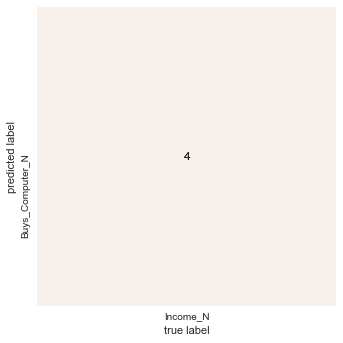

In [119]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Income_N','Student_N','Age_N','Creadit_Rating_N','Buys_Computer_N'], yticklabels=['Income_N','Student_N','Age_N','Creadit_Rating_N','Buys_Computer_N'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()